In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, classification_report
import pickle

In [127]:
df = pd.read_csv('Content\semi_final_data.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\R.PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_1740\3055060685.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('Content\semi_final_data.csv')


,EventName,RoundNumber,eventYear,Team,Compound,Driver,Stint,bestPreRaceTime,bestLapTimeIsFrom,meanAirTemp,...,meanHumid,Rainfall,GridPosition,Position,raceStintsNums,TyreAge,lapNumberAtBeginingOfStint,StintLen,CircuitLength,designedLaps
0,Abu Dhabi Grand Prix,17,2020,Alfa Romeo Racing,HARD,GIO,2,97.066,Qualifying,22.596296,...,61.651852,0.0,14,16,2,1.0,28,27,5.554,55
1,Abu Dhabi Grand Prix,17,2020,Alfa Romeo Racing,HARD,RAI,2,97.555,Qualifying,22.893023,...,58.381395,0.0,15,12,2,NaN,12,43,5.554,55
2,Abu Dhabi Grand Prix,17,2020,Alfa Romeo Racing,MEDIUM,GIO,1,97.066,Qualifying,23.440741,...,52.511111,0.0,14,16,1,1.0,1,27,5.554,55
3,Abu Dhabi Grand Prix,17,2020,Alfa Romeo Racing,MEDIUM,RAI,1,97.555,Qualifying,23.560000,...,51.660000,0.0,15,12,1,1.0,1,10,5.554,55
4,Abu Dhabi Grand Prix,17,2020,Alfa Romeo Racing,MEDIUM,RAI,2,97.555,Qualifying,23.400000,...,51.700000,0.0,15,12,2,NaN,11,1,5.554,55


In [128]:
df.shape

(4611, 21)

In [129]:
print(df['Team'].value_counts(),"\n")
print(df['Compound'].value_counts())

Team
Williams             483
Mercedes             477
Red Bull Racing      474
Ferrari              460
Haas F1 Team         459
McLaren              458
Alfa Romeo Racing    321
Renault              270
AlphaTauri           258
Racing Point         224
Toro Rosso           201
Aston Martin         173
Alpine               163
Sauber                91
Force India           55
Alfa Romeo            44
Name: count, dtype: int64 

Compound
MEDIUM          1495
SOFT            1272
HARD             943
INTERMEDIATE     262
SUPERSOFT        228
ULTRASOFT        224
WET               90
HYPERSOFT         66
UNKNOWN           31
Name: count, dtype: int64


In [130]:
df = df.drop(i for i in range(0,len(df)) if df.loc[i,'Compound'] == 'UNKNOWN')
df.reset_index(drop=True,inplace=True)

In [131]:
Rb = df.copy()

In [132]:
Rb = Rb.drop(i for i in range(0,len(Rb)) if (Rb.loc[i,'Team'] != 'Red Bull Racing'))
Rb.reset_index(drop=True,inplace=True)

In [133]:
Rb.shape

(473, 21)

In [134]:
rows_to_drop = []

for i in range(0,len(Rb)) :
    if(Rb.loc[i,'Position'] >= 10) :
        rows_to_drop.append(i)
        
Rb.drop(rows_to_drop,inplace=True)

In [135]:
print(Rb.shape)
Rb.reset_index(drop=True,inplace=True)

(383, 21)


In [136]:
Rb.iloc[[4]]

,EventName,RoundNumber,eventYear,Team,Compound,Driver,Stint,bestPreRaceTime,bestLapTimeIsFrom,meanAirTemp,...,meanHumid,Rainfall,GridPosition,Position,raceStintsNums,TyreAge,lapNumberAtBeginingOfStint,StintLen,CircuitLength,designedLaps
4,Abu Dhabi Grand Prix,21,2018,Red Bull Racing,HYPERSOFT,RIC,2,95.401,Qualifying,27.4,...,65.2,0.0,5,4,2,34.0,49,1,5.554,55


In [137]:
for i in range(0,len(df)) :
    if (df.loc[i,'Position'] <= 4):
        Rb = pd.concat([Rb, df.loc[[i]]], ignore_index=True)

In [138]:
Rb = Rb.drop_duplicates()
Rb.reset_index(drop=True,inplace=True)
# Rb.to_csv('RedBull_data.csv')
Rb.shape

(1083, 21)

In [139]:
Rb.columns

Index(['EventName', 'RoundNumber', 'eventYear', 'Team', 'Compound', 'Driver',
       'Stint', 'bestPreRaceTime', 'bestLapTimeIsFrom', 'meanAirTemp',
       'meanTrackTemp', 'meanHumid', 'Rainfall', 'GridPosition', 'Position',
       'raceStintsNums', 'TyreAge', 'lapNumberAtBeginingOfStint', 'StintLen',
       'CircuitLength', 'designedLaps'],
      dtype='object')

In [140]:
Rb['EventName'].value_counts()

EventName
Bahrain Grand Prix           79
Spanish Grand Prix           74
British Grand Prix           71
Hungarian Grand Prix         63
Monaco Grand Prix            48
Azerbaijan Grand Prix        47
Russian Grand Prix           47
Italian Grand Prix           45
Austrian Grand Prix          45
Abu Dhabi Grand Prix         39
United States Grand Prix     36
German Grand Prix            36
Chinese Grand Prix           35
Emilia Romagna Grand Prix    35
Belgian Grand Prix           35
Canadian Grand Prix          33
Australian Grand Prix        27
Portuguese Grand Prix        26
Mexican Grand Prix           25
Turkish Grand Prix           25
French Grand Prix            25
Tuscan Grand Prix            24
São Paulo Grand Prix         21
Japanese Grand Prix          21
Singapore Grand Prix         20
Brazilian Grand Prix         20
Dutch Grand Prix             15
Sakhir Grand Prix            13
Qatar Grand Prix             12
Eifel Grand Prix             12
Styrian Grand Prix           1

In [141]:
CircuitEncod = LabelEncoder()

In [142]:
Rb['EventName'] = CircuitEncod.fit_transform(Rb['EventName'])

In [143]:
CircuitEncod.inverse_transform([1])

array(['Australian Grand Prix'], dtype=object)

In [144]:
X = Rb.drop(columns=['RoundNumber', 'eventYear', 'Team', 'Compound', 'Driver','Position',
       'bestPreRaceTime','bestLapTimeIsFrom','raceStintsNums', 'TyreAge', 'StintLen','CircuitLength', 'designedLaps'])

Y = Rb.Compound

In [145]:
X.head()

,EventName,Stint,meanAirTemp,meanTrackTemp,meanHumid,Rainfall,GridPosition,lapNumberAtBeginingOfStint
0,0,2,22.908889,26.611111,58.248889,0.0,5,11
1,0,2,22.911111,26.628889,58.204444,0.0,1,11
2,0,1,23.560000,28.930000,51.620000,0.0,1,1
3,0,1,23.560000,28.910000,51.650000,0.0,5,1
4,0,2,27.400000,28.300000,65.200000,0.0,5,49


In [146]:
Y.value_counts()

Compound
MEDIUM          361
SOFT            303
HARD            220
INTERMEDIATE     67
ULTRASOFT        54
SUPERSOFT        46
WET              18
HYPERSOFT        14
Name: count, dtype: int64

In [147]:
Y[Y == 'HARD'] = 1
Y[Y == 'MEDIUM'] = 2
Y[Y == 'SOFT'] = 3
Y[Y == 'INTERMEDIATE'] = 4
Y[Y == 'SUPERSOFT'] = 5
Y[Y == 'ULTRASOFT'] = 6
Y[Y == 'HYPERSOFT'] = 7
Y[Y == 'WET'] = 8

C:\Users\R.PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_1740\1230993822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[Y == 'HARD'] = 1
C:\Users\R.PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_1740\1230993822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[Y == 'MEDIUM'] = 2
C:\Users\R.PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_1740\1230993822.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[Y == 'SOFT'] = 3
C:\Users\R.PRA

In [148]:
Y = Y.astype('int')
Y.head(2)

0    1
1    1
Name: Compound, dtype: int32

In [149]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=5,test_size=0.1)

In [150]:
model2 = RandomForestClassifier()
model2.fit(X_train,Y_train)

RandomForestClassifier()

In [151]:
y_pred = model2.predict(X_test)
y_pred

array([6, 3, 3, 2, 3, 4, 2, 1, 2, 1, 1, 2, 2, 2, 1, 3, 1, 1, 2, 3, 2, 2,
       4, 1, 4, 3, 1, 3, 1, 2, 8, 1, 1, 2, 4, 3, 6, 2, 2, 2, 2, 6, 1, 2,
       4, 2, 2, 1, 2, 6, 1, 3, 2, 3, 1, 2, 3, 3, 2, 5, 2, 2, 2, 3, 3, 2,
       2, 2, 3, 2, 4, 2, 3, 2, 3, 3, 3, 2, 1, 2, 3, 3, 1, 6, 3, 2, 5, 1,
       3, 2, 1, 2, 3, 3, 2, 1, 2, 2, 3, 2, 2, 2, 2, 3, 2, 6, 1, 2, 3])

In [152]:
accuracy = accuracy_score(y_pred,Y_test)
print(f"Accuracy : {accuracy*100}%")

Accuracy : 74.31192660550458%


In [153]:
feature_scores = pd.Series(model2.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_scores

meanHumid                     0.194909
meanAirTemp                   0.181706
meanTrackTemp                 0.169580
lapNumberAtBeginingOfStint    0.161469
EventName                     0.122620
GridPosition                  0.075183
Stint                         0.058559
Rainfall                      0.035974
dtype: float64

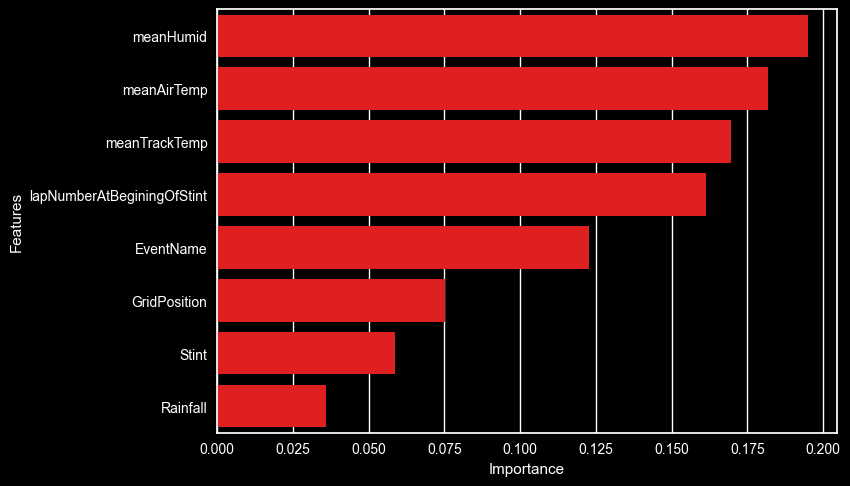

In [154]:
plt.style.use('dark_background')
sns.barplot( x=feature_scores,y=feature_scores.index,color='red')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

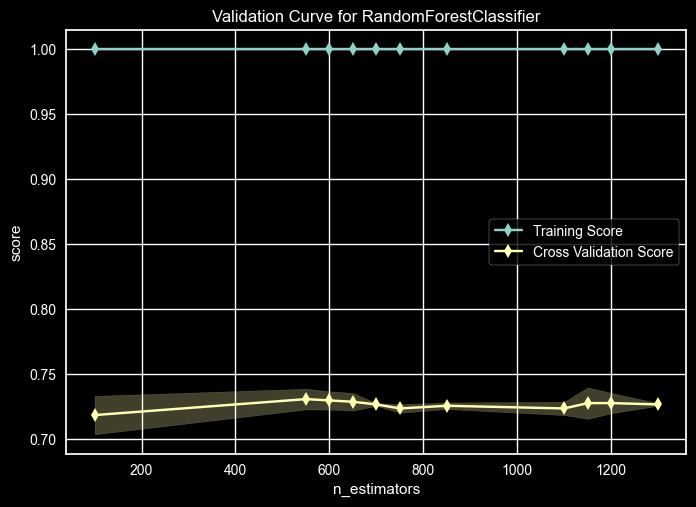

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='n_estimators', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='n_estimators',
                param_range=array([ 100,  550,  600,  650,  700,  750,  850, 1100, 1150, 1200, 1300]),
                scoring='accuracy')


In [155]:
from yellowbrick.model_selection import validation_curve

n_est = [100,550,600,650,700,750,850,1100,1150,1200,1300]

print(validation_curve(RandomForestClassifier(), X=X_train, y=Y_train, param_name='n_estimators', param_range=n_est, scoring='accuracy', cv=3))

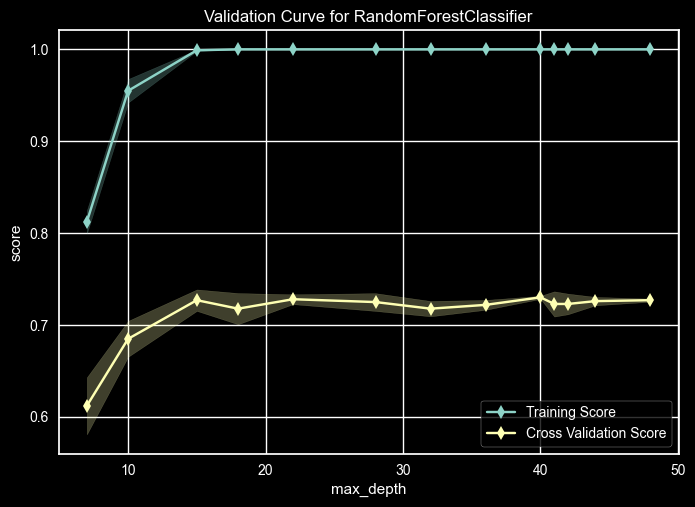

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='max_depth',
                param_range=array([ 7, 10, 15, 18, 22, 28, 32, 36, 40, 41, 42, 44, 48]),
                scoring='accuracy')


In [156]:
depth_vals = [7,10,15,18,22,28,32,36,40,41,42,44,48]

plt.style.use('dark_background')
print(validation_curve(RandomForestClassifier(), X=X_train, y=Y_train, param_name='max_depth', param_range=depth_vals, scoring='accuracy', cv=3))

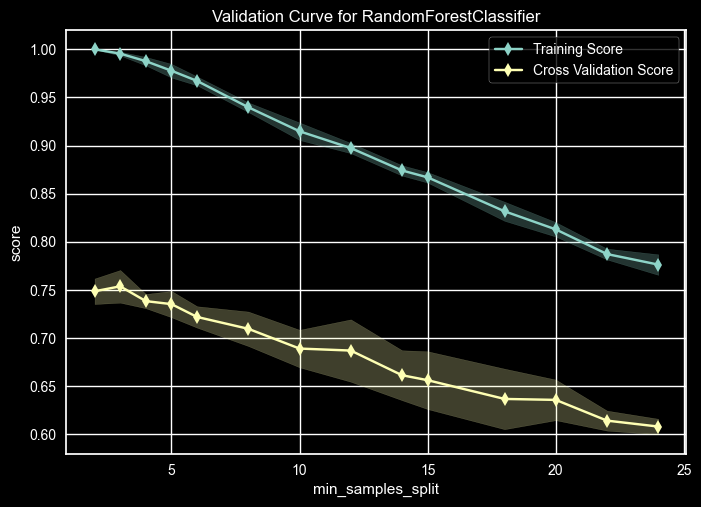

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='min_samples_split', ylabel='score'>,
                cv=4, estimator=RandomForestClassifier(),
                param_name='min_samples_split',
                param_range=array([ 2,  3,  4,  5,  6,  8, 10, 12, 14, 15, 18, 20, 22, 24]),
                scoring='accuracy')


In [195]:
min_samples = [2,3,4,5,6,8,10,12,14,15,18,20,22,24]

plt.style.use('dark_background')
print(validation_curve(RandomForestClassifier(), X=X_train, y=Y_train, param_name='min_samples_split', param_range=min_samples, scoring='accuracy', cv=4))

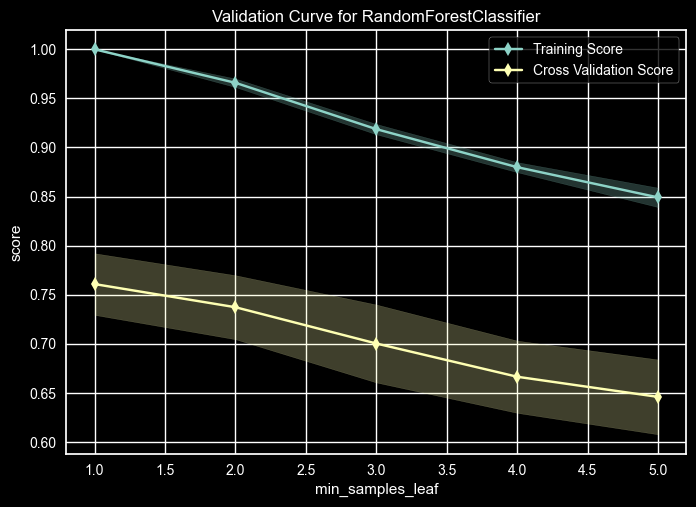

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='min_samples_leaf', ylabel='score'>,
                cv=5, estimator=RandomForestClassifier(),
                param_name='min_samples_leaf',
                param_range=array([1, 2, 3, 4, 5]), scoring='accuracy')


In [158]:
min_leaf = [1,2,3,4,5]

print(validation_curve(RandomForestClassifier(),X=X_train,y=Y_train, param_name='min_samples_leaf', param_range=min_leaf, scoring='accuracy', cv=5))

In [159]:
max_features = ['auto','sqrt']

In [196]:
model = RandomForestClassifier(n_estimators=550,max_depth=15,min_samples_split=3,max_features='sqrt',min_samples_leaf=1,random_state=0)
model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=15, min_samples_split=3, n_estimators=550,
                       random_state=0)

In [197]:
y_pred = model.predict(X_test)
print(y_pred)
print(f"Accuracy : {round(accuracy_score(y_pred,Y_test)*100,2)}%")

[6 3 3 2 3 4 2 1 1 1 1 2 2 2 1 3 1 1 2 3 2 2 4 1 4 3 1 3 1 2 8 1 1 2 4 3 6
 2 2 2 2 6 1 2 4 2 2 2 2 6 1 3 2 3 1 2 3 6 2 3 2 2 2 3 3 2 2 2 3 2 4 2 3 2
 3 3 3 2 1 2 3 3 1 6 3 2 5 1 3 2 1 2 3 3 2 1 2 2 3 2 2 2 2 3 2 6 1 2 1]
Accuracy : 74.31%


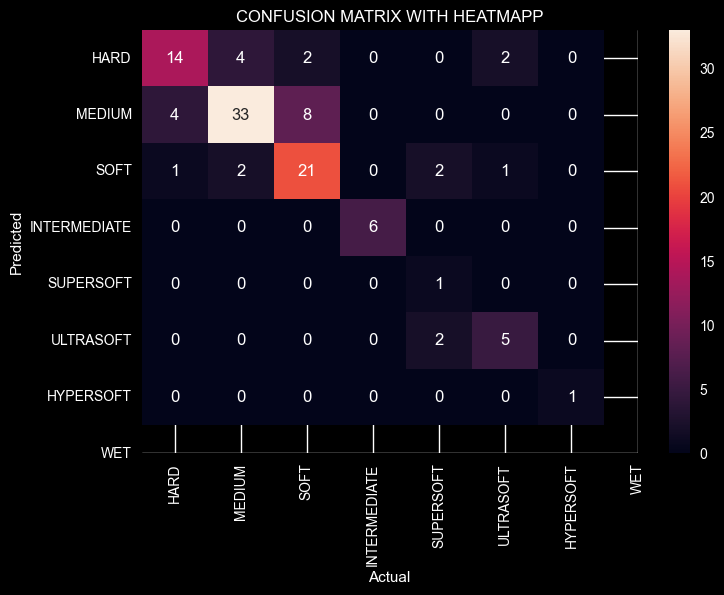

In [194]:
Tyres = ['HARD','MEDIUM','SOFT','INTERMEDIATE','SUPERSOFT','ULTRASOFT','HYPERSOFT','WET']
conf = confusion_matrix(y_pred,Y_test)
sns.heatmap(conf,annot=True,xticklabels=Tyres,yticklabels=Tyres)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("CONFUSION MATRIX WITH HEATMAPP")
plt.show()

In [163]:
def DecodeTarget(res) :
    if res == 1:
        print('HARD') 
    elif res == 2:
        print('MEDIUM') 
    elif res == 3:
        print('SOFT') 
    elif res == 4:
        print('INTERMEDIATE')
    elif res == 5:
        print('SUPERSOFT')
    elif res == 6:
        print('ULTRASOFT')
    elif res == 7:
        print('HYPERSOFT')
    elif res == 8:
        print('WET')

In [164]:
row = int(12)
input = X.loc[row , : ].values
print(input)
DecodeTarget(Y[row])

[ 0.     1.    26.116 29.948 63.748  0.     2.     1.   ]
MEDIUM


In [165]:
pred = model.predict([[ 0.  ,   1.,    26.116 ,29.948, 63.748,  0.,     2.,     1.   ]])
DecodeTarget(pred[0])

MEDIUM


c:\Users\R.PRAVEEN KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [166]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain_scaled = sc.fit_transform(X_train)
Xtest_scaled = sc.fit_transform(X_test)

In [198]:
from sklearn import tree

DTree = tree.DecisionTreeClassifier()
DTree.fit(X_train,Y_train)
pred_DTree = DTree.predict(X_test)
print(accuracy_score(Y_test,pred_DTree)*100)
pred_DTree

72.47706422018348


array([6, 3, 3, 2, 3, 4, 2, 5, 2, 1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 3, 2, 2,
       4, 3, 4, 3, 1, 3, 1, 2, 8, 2, 1, 2, 4, 3, 6, 2, 2, 2, 2, 6, 4, 2,
       4, 2, 2, 1, 2, 6, 1, 3, 2, 3, 1, 6, 3, 6, 2, 2, 2, 2, 2, 3, 5, 2,
       2, 2, 3, 2, 4, 2, 1, 2, 3, 1, 3, 2, 1, 2, 3, 3, 1, 6, 3, 2, 5, 1,
       3, 2, 1, 2, 3, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 6, 2, 2, 1])

In [168]:
n_est = [100,250,350,450,600,750,900,1000]
min_samples_split = [1,2,3,4,5,6,8]
min_samples_leaf = [1,2,3,4,5]
max_depth = [2,8,14,20,22,28,32,35,40,42,45]
max_features = [0.2,0.4,0.6,0.8,1.0]
max_samples = [0.25,0.5,0.75,1.0]
bootstrap = [True,False]

In [169]:
parGrid = {
    'n_estimators': [100,200,350,500,650,900,1000,1200],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': [10,15,20,25,30,35,40, None],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

In [170]:
rf_Model = RandomForestClassifier()

In [171]:
from sklearn.model_selection import RandomizedSearchCV

rf_Grid = RandomizedSearchCV(
                            estimator=rf_Model,
                            param_distributions=parGrid,
                            scoring='accuracy'
                        )

In [172]:
rf_Grid.fit(X_train,Y_train)

c:\Users\R.PRAVEEN KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\R.PRAVEEN KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\R.PRAVEEN KUMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\R.PRAVEEN KUMAR\AppData\Local\Programs\Python\Pyt

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [None, 'balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 15, 20, 25, 30, 35,
                                                      40, None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [100, 200, 350, 500,
                                                         650, 900, 1000,
                                                         1200]},
                   scoring='accuracy')

In [173]:
print(rf_Grid.best_estimator_)
print(rf_Grid.best_score_*100)
rf_Grid.best_params_

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=20,
                       max_features='log2', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=650)
74.84588950568332


{'n_estimators': 650,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 20,
 'criterion': 'entropy',
 'class_weight': None,
 'bootstrap': False}

In [174]:
from sklearn.model_selection import cross_val_score

best_clf = rf_Grid.best_estimator_
scores = cross_val_score(best_clf, X_train, Y_train, cv=5, scoring='accuracy')
scores.mean()*100

75.35923869944489

In [175]:
best_train_pred = best_clf.predict(X_train)
best_test_pred = best_clf.predict(X_test)

print(f"Train Accuracy: {accuracy_score(best_train_pred,Y_train)*100}")
print(f"Test Accuracy: {accuracy_score(best_test_pred,Y_test)*100}")


Train Accuracy: 95.7905544147844
Test Accuracy: 76.14678899082568


Best Score is computed without OverFitting the model ✅☑️

##Trying the same Hyper parameters of "best_clf" classified model

In [187]:
RF = RandomForestClassifier(n_estimators= 650,min_samples_split= 10,
                            min_samples_leaf= 2,max_features= 'log2',max_depth= 20,
                            criterion= 'entropy',class_weight=None,bootstrap= False,
                        )
RF.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=20,
                       max_features='log2', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=650)

In [202]:
print(round(accuracy_score(RF.predict(X_train),Y_train)*100,2))
print(round(accuracy_score(RF.predict(X_test),Y_test)*100,2))

96.1
76.15


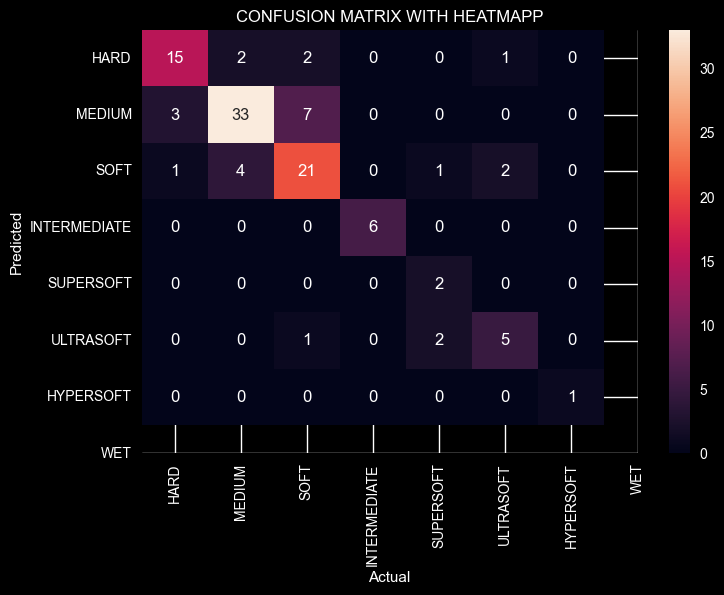

In [189]:
conf = confusion_matrix(RF.predict(X_test),Y_test)
sns.heatmap(conf,annot=True,xticklabels=Tyres,yticklabels=Tyres)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("CONFUSION MATRIX WITH HEATMAPP")
plt.show()

Our Best HyperTuned Model is "best_clf" (RandomForestClassifier)

In [191]:
pickle.dump(best_clf, open('Strategy_Pred.pkl','wb'))